# Toy Project: CIFAR-10 CNN Classification



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Define dataset transforms HorizontalFlip 적용
define_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=define_transforms)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=define_transforms)

testloader = DataLoader(testset, batch_size=32, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)  # 추가된 conv
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.LeakyReLU(0.1)  # ReLU → LeakyReLU
        self.fc1 = nn.Linear(64 * 4 * 4, 256)  #  FC 확장
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


In [ ]:
# Check for GPU and instantiate model, loss, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
#optimizer 변경 SGD > Adam 학습률 0.01에서 0.001로 변경, L2정규화

Using device: cuda


In [ ]:
# Training loop function
def train_model(model, trainloader, criterion, optimizer, num_epochs=10):
    train_losses = []
    train_accuracies = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, (inputs, labels) in enumerate(trainloader, 0):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            if i % 100 == 99:
                print(f'[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss/100:.3f}')
                running_loss = 0.0
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        print(f'Epoch {epoch+1} accuracy: {epoch_acc:.2f}%')
    print('Training complete')
    return train_losses, train_accuracies


In [ ]:
# Testing function
def test_model(model, testloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total:.2f}%')


In [ ]:
# Plotting training metrics
def plot_training_curves(train_losses, train_accuracies):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(epochs, train_losses, 'r-', label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, train_accuracies, 'b-', label='Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy')
    plt.legend()
    plt.show()


[Epoch 1, Batch 100] loss: 2.093
[Epoch 1, Batch 200] loss: 1.793
[Epoch 1, Batch 300] loss: 1.697
[Epoch 1, Batch 400] loss: 1.569
[Epoch 1, Batch 500] loss: 1.513
[Epoch 1, Batch 600] loss: 1.443
[Epoch 1, Batch 700] loss: 1.407
[Epoch 1, Batch 800] loss: 1.382
[Epoch 1, Batch 900] loss: 1.320
[Epoch 1, Batch 1000] loss: 1.313
[Epoch 1, Batch 1100] loss: 1.233
[Epoch 1, Batch 1200] loss: 1.249
[Epoch 1, Batch 1300] loss: 1.241
[Epoch 1, Batch 1400] loss: 1.220
[Epoch 1, Batch 1500] loss: 1.169
Epoch 1 accuracy: 47.65%
[Epoch 2, Batch 100] loss: 1.139
[Epoch 2, Batch 200] loss: 1.148
[Epoch 2, Batch 300] loss: 1.080
[Epoch 2, Batch 400] loss: 1.098
[Epoch 2, Batch 500] loss: 1.099
[Epoch 2, Batch 600] loss: 1.066
[Epoch 2, Batch 700] loss: 1.033
[Epoch 2, Batch 800] loss: 1.038
[Epoch 2, Batch 900] loss: 1.036
[Epoch 2, Batch 1000] loss: 1.002
[Epoch 2, Batch 1100] loss: 1.052
[Epoch 2, Batch 1200] loss: 1.009
[Epoch 2, Batch 1300] loss: 0.972
[Epoch 2, Batch 1400] loss: 0.961
[Epoch 

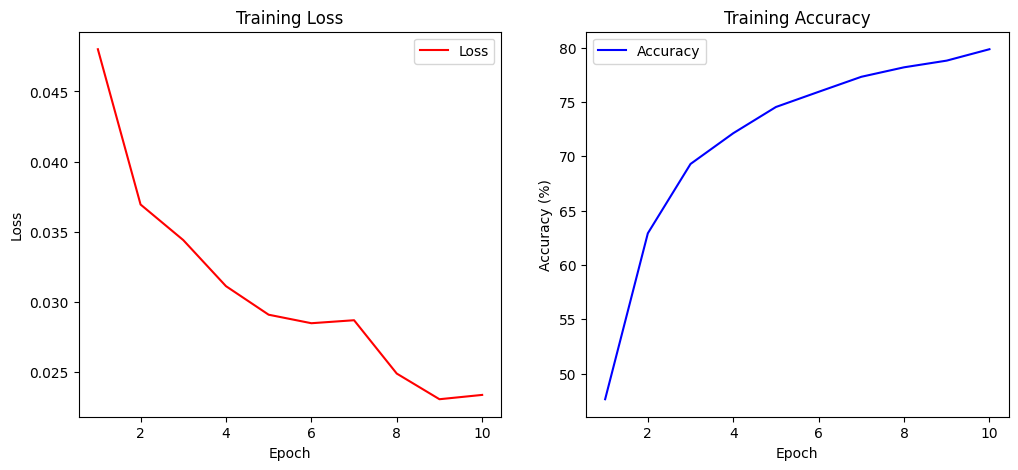

In [ ]:
# Run training, testing and plotting
if __name__ == '__main__':
    losses, accs = train_model(model, trainloader, criterion, optimizer, num_epochs=10)
    test_model(model, testloader)
    plot_training_curves(losses, accs)
